# Exploratory dataset analysis
Dataset: **Iris Plants** avaliable for download at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.stats import ttest_ind,probplot,norm

In [2]:
irisdata = load_iris()  #json object

In [3]:
irisdata.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = irisdata.data[:, :4] #all features are real-valued

In [5]:
pdX = pd.DataFrame(data=X, columns=irisdata.feature_names)

In [6]:
pd.DataFrame.describe(pdX)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
y = irisdata.target
np.bincount(y)

array([50, 50, 50])

### Distributions - Histograms

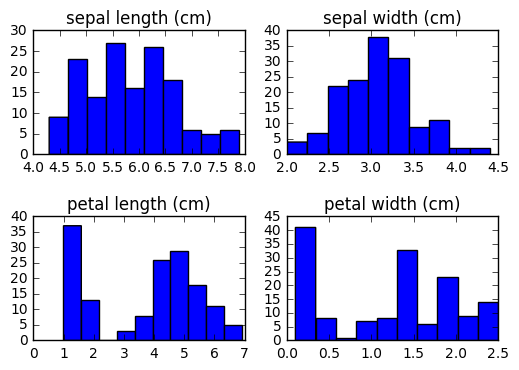

In [9]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.subplots_adjust(hspace=0.5)
ax1.hist(X[:,0])
ax1.set_title(irisdata.feature_names[0])
ax2.hist(X[:,1])
ax2.set_title(irisdata.feature_names[1])
ax3.hist(X[:,2])
ax3.set_title(irisdata.feature_names[2])
ax4.hist(X[:,3])
ax4.set_title(irisdata.feature_names[3])
plt.show()

### Normality test for Sepal Length (cm)
The points are pretty close to the diagonal in the probability plot

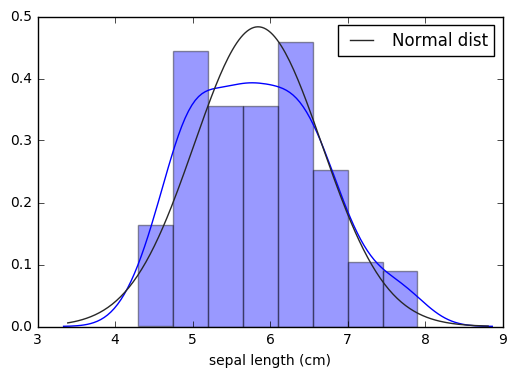

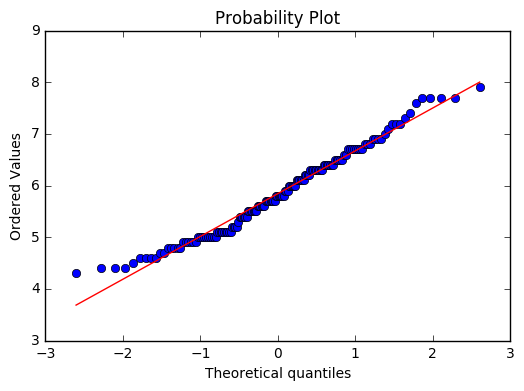

In [10]:
sns.distplot(pdX[irisdata.feature_names[0]], fit=norm);
plt.legend(["Normal dist"])
plt.show()
res = probplot(pdX[irisdata.feature_names[0]], plot=plt)
plt.show()

### Normality test for Sepal Width (cm)
The points have a weird distribution. Check kurtosis and skew

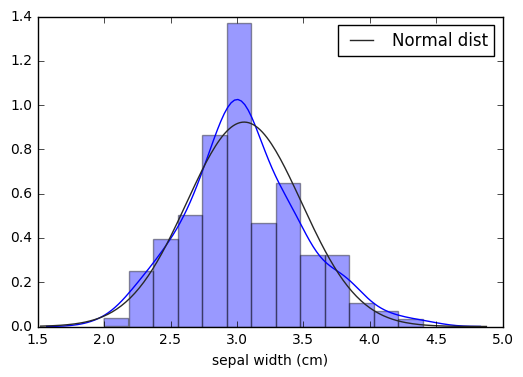

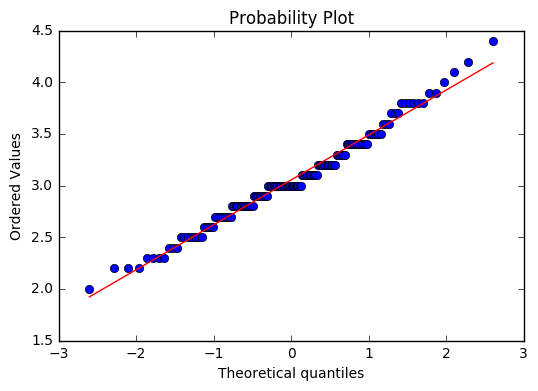

In [12]:
sns.distplot(pdX[irisdata.feature_names[1]], fit=norm);
plt.legend(["Normal dist"])
plt.show()
res = probplot(pdX[irisdata.feature_names[1]], plot=plt)
plt.show()

### Normality test for Petal Length (cm)
The points have a weird distribution. Definitely not a normal dist

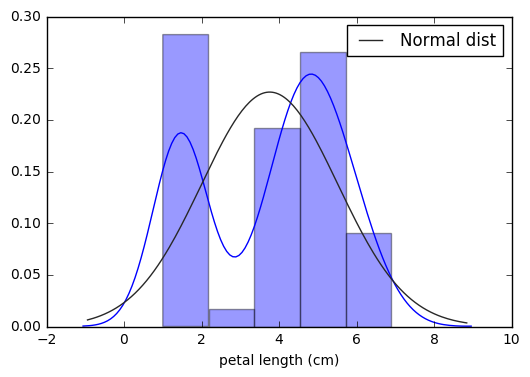

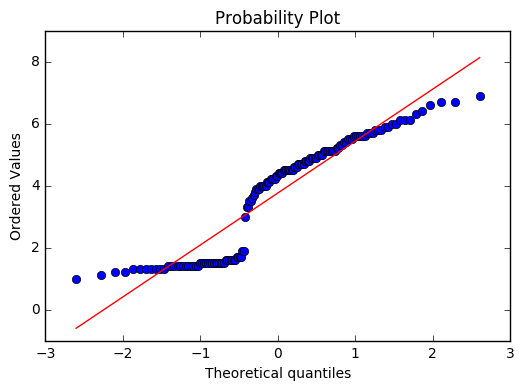

In [13]:
sns.distplot(pdX[irisdata.feature_names[2]], fit=norm);
plt.legend(["Normal dist"])
plt.show()
res = probplot(pdX[irisdata.feature_names[2]], plot=plt)
plt.show()

### Normality test for Petal Width (cm)
The points have a weird distribution. Definitely not a normal dist

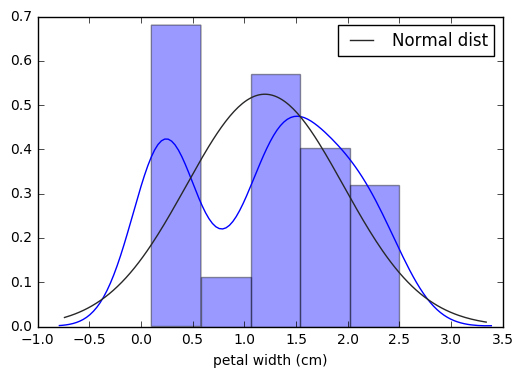

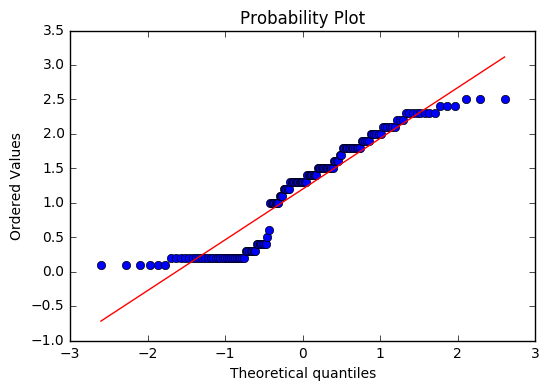

In [14]:
sns.distplot(pdX[irisdata.feature_names[3]], fit=norm);
plt.legend(["Normal dist"])
plt.show()
res = probplot(pdX[irisdata.feature_names[3]], plot=plt)
plt.show()

### Skew and Kurtosis
sepal length's skew is not < 2 std.error on absolute terms

In [15]:
for feature in irisdata.feature_names:
    print("Skew of {} is {} ; Std Error is {}".format(feature,pdX[feature].skew(),pdX[feature].std()
                                                      /np.sqrt(len(pdX[feature]-1))))
for feature in irisdata.feature_names:
    print("Kurtosis of {} is {}".format(feature,pdX[feature].kurt()))

Skew of sepal length (cm) is 0.3149109566369728 ; Std Error is 0.0676113162275986
Skew of sepal width (cm) is 0.3340526621720866 ; Std Error is 0.03540282727369267
Skew of petal length (cm) is -0.27446425247378287 ; Std Error is 0.1440643240210084
Skew of petal width (cm) is -0.10499656214412734 ; Std Error is 0.062311813629700445
Kurtosis of sepal length (cm) is -0.5520640413156395
Kurtosis of sepal width (cm) is 0.2907810623654279
Kurtosis of petal length (cm) is -1.4019208006454036
Kurtosis of petal width (cm) is -1.3397541711393433


### Box Plot of features
Visual observation:
Sepal length  doesn't seem to have skew, but from the distplot it's clear there is a +ve skew with higher # of samples away from mean

Sepal width has +ve skew

Petal length has -ve skew

Petal with has -ve skew

In [18]:
sns.set_style("whitegrid")

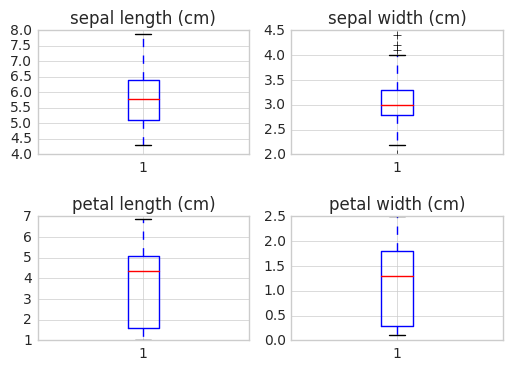

In [19]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.subplots_adjust(hspace=0.5)
ax1.boxplot(X[:,0])
ax1.set_title(irisdata.feature_names[0])
ax2.boxplot(X[:,1])
ax2.set_title(irisdata.feature_names[1])
ax3.boxplot(X[:,2])
ax3.set_title(irisdata.feature_names[2])
ax4.boxplot(X[:,3])
ax4.set_title(irisdata.feature_names[3])
plt.show()

### p-value test
All values of p<0.001. Hence statistically significant.

In [20]:
for i in range(len(irisdata.feature_names)):
    for j in range(len(irisdata.feature_names)):
        if i<j:
            t,p = ttest_ind(pdX[irisdata.feature_names[i]],pdX[irisdata.feature_names[j]])
            print(irisdata.feature_names[i], irisdata.feature_names[j], t,p)

sepal length (cm) sepal width (cm) 36.548157694 3.98783811485e-112
sepal length (cm) petal length (cm) 13.0995044945 2.82973386374e-31
sepal length (cm) petal width (cm) 50.5152014139 3.79743788312e-148
sepal width (cm) petal length (cm) -4.75001005012 3.16635704916e-06
sepal width (cm) petal width (cm) 25.8883439026 3.10962649347e-78
petal length (cm) petal width (cm) 16.3096065259 3.49397773423e-43


### Per label distributions for each feature
Gives us a basic idea of clustering from one dimensional aspect.
3 variables seem to have similar ascent (Sepal length, petal length, petal width). while sepal width seems to explain differently.
Perhaps 2 dimensions are enough to explain this variations

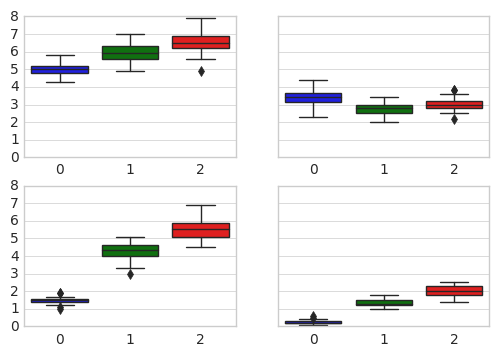

In [22]:
fig, ax = plt.subplots(2,2, sharey=True)
sns.boxplot(y, X[:,0],ax=ax[0][0])
sns.boxplot(y,X[:,1],ax=ax[0][1])
sns.boxplot(y, X[:,2],ax=ax[1][0])
sns.boxplot(y,X[:,3],ax=ax[1][1])
plt.show()

### Correlation
First try: Pearson's correlation for linear relationships

In [23]:
corrmat = pdX.corr(method="pearson")

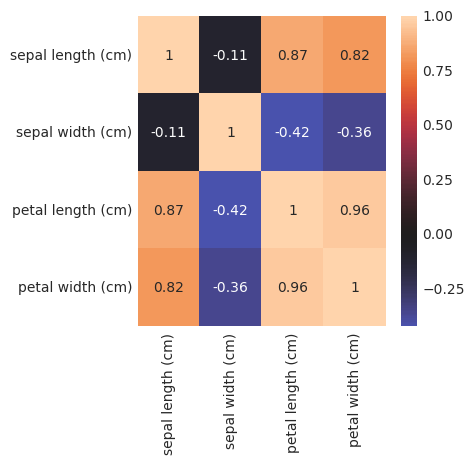

In [24]:
f, ax = plt.subplots(figsize=(4, 4))
pl = sns.heatmap(corrmat,center=0,annot=True)# vmax=0.8, square=True)
pl.figure

We see that petal lengths and petal widths are positively correlated with sepal length, while they are slightly negatively correlated with sepal width.

Petal length and petal width are also highly positively correlated.

### Correlation visualization - scatter plots
1. sepal length - petal length - linear relationship, slight dispersion that violates homoscedasticity, corr value=0.87
2. sepal length - petal width - linear relationship, slight dispersion that violates homoscedasticity,corr value = 0.82
3. petal length - petal width - linear relationship, maintains homoscedasticity, corr value = 0.96
4. sepal width - sepal length - no linear relationship, no point of homoscedasticity
5. sepal width  - petal length - no linear relationship, no no point of homoscedasticity
6. sepal width  - petal width - no linear relationship, no no point of homoscedasticity

Our correlations are confirmed by the visualizations, if there exists a linear relationship. This also means sepal length, petal length and petal width are highly correlated and less independent of each other

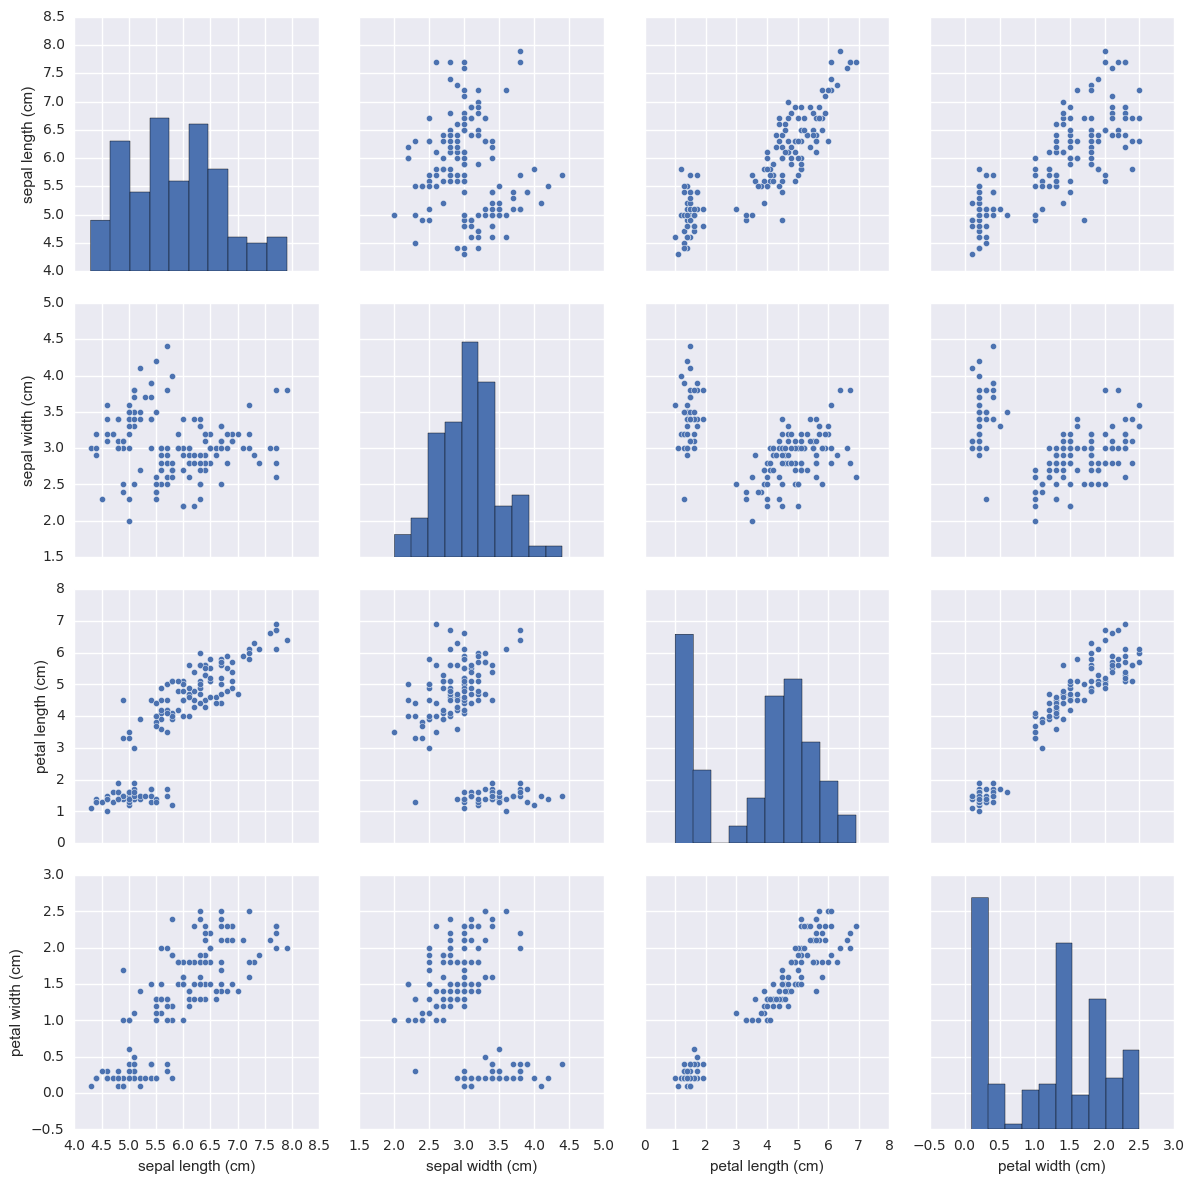

In [25]:
plt.clf()
sns.set()
cols = irisdata.feature_names
sns.pairplot(pdX,size=3)
plt.show()

#### Spearman's correlation to check if a variable is a perfect monotone function of the other
Similar observations are seen

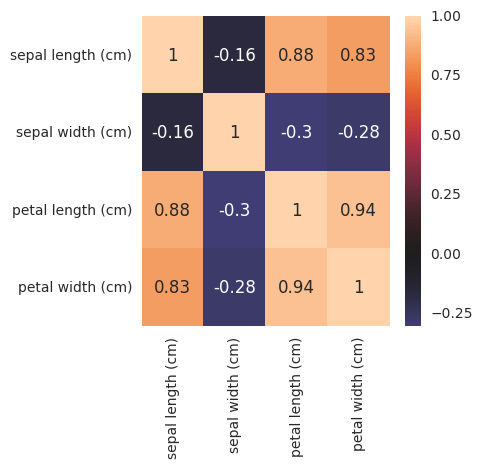

In [26]:
spearman_corrmat = pdX.corr(method="spearman")
f, ax = plt.subplots(figsize=(4, 4))
pl = sns.heatmap(spearman_corrmat,center=0,annot=True)# vmax=0.8, square=True)
pl.figure

In [27]:
plt.clf()

### Dimensionality Reduction
Let's now look at what are the principal components that explain most of the data

In [28]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [29]:
pca = PCA(n_components = 4)

In [30]:
pca.fit(X)

PCA(copy=True, n_components=4, whiten=False)

In [31]:
print(pca.explained_variance_ratio_) 

[ 0.92461621  0.05301557  0.01718514  0.00518309]


We see that the first two components explain most of the variance. This confirms our initial hypothesis. 
Let's use these components

In [32]:
Xt = pca.transform(X)

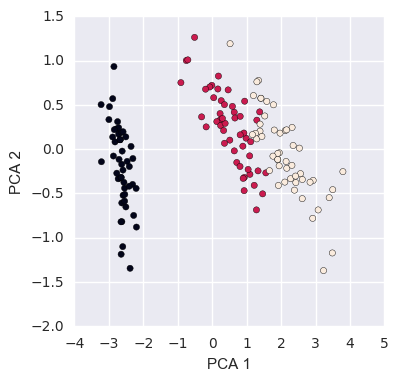

In [33]:
plt.clf()
plt.scatter(Xt[:,0],Xt[:,1],c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

While we now know that 2 dimensions are sufficient for analysis, the value of #clusters, k = 3 (from domain knowledge) needs to be verified

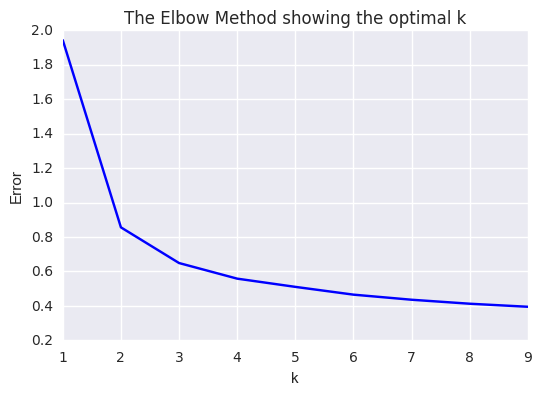

In [34]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
error_dist = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(Xt)
    model.fit(Xt)
    error_dist.append(sum(np.min(cdist(Xt, model.cluster_centers_, 'euclidean'), axis=1)) / Xt.shape[0])

# Plot the elbow
plt.plot(K, error_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Now that k=3 is optimal, we can go ahead and cluster

In [35]:
model = KMeans(n_clusters=3).fit(Xt)
model.fit(Xt)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [36]:
y_kmean = np.argmin(cdist(Xt, model.cluster_centers_, 'euclidean'), axis=1)

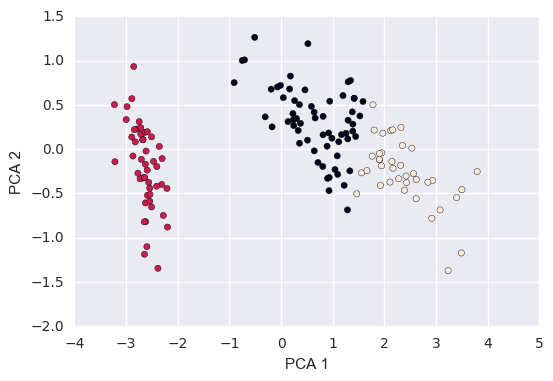

In [37]:
plt.scatter(Xt[:,0],Xt[:,1],c=y_kmean)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [38]:
np.bincount(y_kmean)

array([62, 50, 38])

In summary, we can transform given 4D input into a 2D space and cluster the data into the three type of species.
Note that we shouln't be comparing y and y_kmean (as the cluster values are different)
However we can compare the number of values clustered together. The dataset of 50 points each of the three types. The kmeans clustering classified almost proportionately.

### References
1. [Kaggle - comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
2. [Pearson Correlation](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf)
3. [What are p-values](https://www.quora.com/What-are-p-values-and-why-are-they-in-the-news-now/answer/Zachary-Taylor-3)